The aim of this model is to predict(with a confidence percentage output) the next n days with a set % price change parameter which will tell me whether to buy, sell, or hold stocks. 

In [105]:
!pip install --upgrade pip 
!pip install pandas-datareader

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)


In [106]:
from collections import Counter
import bs4 as bs 
import pickle 
import requests 
import datetime as dt 
import os 
import numpy as np 
import pandas as pd 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm, neighbors 
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier 
from sklearn.model_selection import train_test_split


In [107]:
style.use('ggplot')

In [108]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [109]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [110]:
!ls "/content/gdrive/My Drive/DATASETS"

flower_photos  STOCKS


In [111]:
import yfinance as yf

In [112]:
from pandas_datareader import data as pdr
yf.pdr_override()

I have decided to use Beautiful Soup as my Python package to parse data

In [113]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers= []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker.replace('.','-')
        tickers.append(ticker.strip())
    
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    print(tickers)
    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [114]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('/content/gdrive/My Drive/DATASETS/STOCKS/stock_dfs'):
        os.makedirs('/content/gdrive/My Drive/DATASETS/STOCKS/stock_dfs')
    
    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('/content/gdrive/My Drive/DATASETS/STOCKS/stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.to_csv('/content/gdrive/My Drive/DATASETS/STOCKS/stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'. format(ticker))
            
get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AIV
Alre

In [115]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('/content/gdrive/My Drive/DATASETS/STOCKS/stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else: 
            main_df = main_df.join(df, how='outer')
            
        if count % 10 == 0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('/content/gdrive/My Drive/DATASETS/STOCKS/sp500_joined_closes.csv')

compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV  ...        ZBH       ZION  ZTS
Date                                    ...                           
2009-12-31        NaN        NaN   NaN  ...        NaN        NaN  NaN
2010-01-04  62.895260  18.152946   NaN  ...  55.689026  11.942696  NaN
2010-01-05  62.501301  18.006285   NaN  ...  57.451908  12.363780  NaN
2010-01-06  63.387695  18.106277   NaN  ...  57.433365  13.438891  NaN
2010-01-07  63.433144  18.256275   NaN  ...  58.750889  14.944045  NaN

[5 rows x 505 columns]


Lets visualise a stock

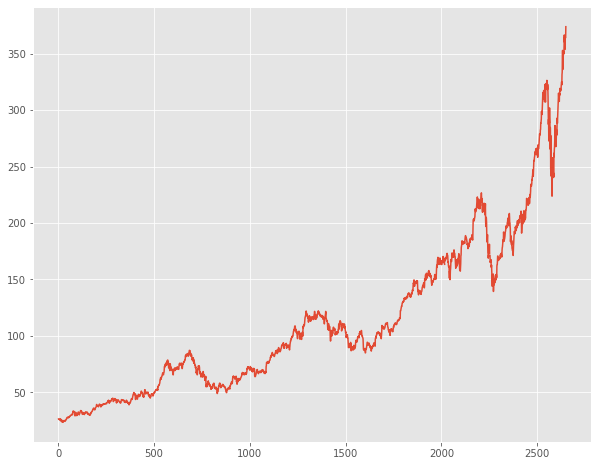

In [116]:
def visualize_data():
    plt.figure(figsize=(10, 8))
    df = pd.read_csv('/content/gdrive/My Drive/DATASETS/STOCKS/sp500_joined_closes.csv')
    df['AAPL'].plot()    
visualize_data()

Using df_corr allows us to compute pairwise correlations of the data in our columns 

In [117]:
df = pd.read_csv('/content/gdrive/My Drive/DATASETS/STOCKS/sp500_joined_closes.csv')
df_corr = df.corr()
print(df_corr)

           MMM       ABT      ABBV  ...       ZBH      ZION       ZTS
MMM   1.000000  0.772297  0.844052  ...  0.901218  0.893825  0.572088
ABT   0.772297  1.000000  0.817996  ...  0.843114  0.799601  0.980064
ABBV  0.844052  0.817996  1.000000  ...  0.736069  0.841168  0.829159
ABMD  0.826110  0.802699  0.848441  ...  0.697402  0.881440  0.715556
ACN   0.850672  0.968944  0.882002  ...  0.882943  0.866237  0.971961
...        ...       ...       ...  ...       ...       ...       ...
YUM   0.834478  0.957599  0.815304  ...  0.866094  0.867850  0.935058
ZBRA  0.722788  0.976042  0.808249  ...  0.796418  0.798644  0.962110
ZBH   0.901218  0.843114  0.736069  ...  1.000000  0.799264  0.755897
ZION  0.893825  0.799601  0.841168  ...  0.799264  1.000000  0.696154
ZTS   0.572088  0.980064  0.829159  ...  0.755897  0.696154  1.000000

[505 rows x 505 columns]


We can also visualise this correlation in a heatmap, I have added the code below for those who would still like to view this in addition to the table above

In [118]:
"""
data = df_corr.values
fig = plt.figure(figsize=(18, 12))
ax=fig.add_subplot(1, 1, 1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index 

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show()

visualize_data()
"""

'\ndata = df_corr.values\nfig = plt.figure(figsize=(18, 12))\nax=fig.add_subplot(1, 1, 1)\n\nheatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)\nfig.colorbar(heatmap)\nax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)\nax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)\nax.invert_yaxis()\nax.xaxis.tick_top()\n\ncolumn_labels = df_corr.columns\nrow_labels = df_corr.index \n\nax.set_xticklabels(column_labels)\nax.set_yticklabels(row_labels)\nplt.xticks(rotation=90)\nheatmap.set_clim(-1,1)\nplt.tight_layout()\nplt.show()\n\nvisualize_data()\n'

In [260]:
def process_data_for_labels(ticker):
  hm_days = 7
  df = pd.read_csv('/content/gdrive/My Drive/DATASETS/STOCKS/sp500_joined_closes.csv', index_col=0)
  tickers = df.columns.values.tolist()
  df.fillna(0, inplace=True)

  for i in range(1, hm_days+1):
    df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
  df.fillna(0, inplace=True)
  return tickers, df 

process_data_for_labels('STX') #Seagate Technology plc stock

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'ADS',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BRK.B',
  'BBY',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BF.B',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  '

Lets now set the % change parameters we want to set, I have chosen 1% over the next 7 days 

In [261]:
def buy_sell_hold(*args):
  cols = [c for c in args]
  requirement = 0.01   #1% change in stock price 
  for col in cols:
    if col > requirement:
      return 1 #buy 
    if col < -requirement:
      return -1 #sell
  return 0  #hold

In [262]:
def extract_featuresets(ticker):
  tickers, df = process_data_for_labels(ticker)

  df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                            df['{}_1d'.format(ticker)],
                                            df['{}_2d'.format(ticker)],
                                            df['{}_3d'.format(ticker)],
                                            df['{}_4d'.format(ticker)],
                                            df['{}_5d'.format(ticker)],
                                            df['{}_6d'.format(ticker)],
                                            df['{}_7d'.format(ticker)]
                                            ))
                                           
  vals = df['{}_target'.format(ticker)].values.tolist()
  str_vals = [str(i) for i in vals]
  print('Data spread:', Counter(str_vals))

  df.fillna(0, inplace=True)
  df = df.replace([np.inf, -np.inf], np.nan)
  df.dropna(inplace=True)

  df_vals = df[[ticker for ticker in tickers]].pct_change()   #X_train
  df_vals = df_vals.replace([np.inf, -np.inf], 0)
  df_vals.fillna(0, inplace=True)

  X = df_vals.values
  y = df['{}_target'.format(ticker)].values      

  return X, y, df 

extract_featuresets('STX')

Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.26373190e-03, -8.07922607e-03,  0.00000000e+00, ...,
          3.16558281e-02,  3.52587404e-02,  0.00000000e+00],
        [ 1.41820168e-02,  5.55321398e-03,  0.00000000e+00, ...,
         -3.22761141e-04,  8.69565284e-02,  0.00000000e+00],
        ...,
        [ 1.03583651e-02,  6.43827991e-03, -2.62257553e-03, ...,
          1.06418997e-02, -4.30105662e-03,  3.42591452e-03],
        [ 6.74995455e-03,  8.02339626e-03,  1.31477434e-03, ...,
         -2.10596211e-02,  1.51188424e-02,  6.82843539e-03],
        [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]]),
 array([-1, -1, -1, ...,  1, -1,  0]),
                    MMM        ABT       ABBV  ...    STX_6d    STX_7d  STX_target
 Date                                          ...                                
 2010-01-04   62.895260 

For the ML model I thought it was best to use multiple algorithms to see the different fluctuations, if any, in their results of confidence 

In [263]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  #y_train would be either -1, 0, 1 (sell, hold, buy)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

  clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                        ('knn', neighbors.KNeighborsClassifier()),
                        ('rfor', RandomForestClassifier())])
                                                                      
  clf.fit(X_train, y_train) 
  confidence = clf.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = clf.predict(X_test)
  print('Predicted spread:', Counter(predictions))

  return confidence 

do_ml('STX')

Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.5483383685800605
Predicted spread: Counter({1: 512, -1: 150})


0.5483383685800605

In [264]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  #y_train would be either -1, 0, 1 (sell, hold, buy)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  


  lsvc = svm.LinearSVC()
  lsvc.fit(X_train, y_train)
                                                                      
  lsvc.fit(X_train, y_train) 
  confidence = lsvc.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = lsvc.predict(X_test)
  print('Predicted spread:', Counter(predictions))


  return confidence 

do_ml('STX')

Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.5287009063444109
Predicted spread: Counter({1: 506, -1: 156})


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5287009063444109

In [265]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  #y_train would be either -1, 0, 1 (sell, hold, buy)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  


  svc = svm.SVC(decision_function_shape='ovo')
  svc.fit(X, y)
                                                                      
  svc.fit(X_train, y_train) 
  confidence = svc.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = svc.predict(X_test)
  print('Predicted spread:', Counter(predictions))


  return confidence 

do_ml('STX')

Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})
Accuracy 0.5468277945619335
Predicted spread: Counter({1: 662})


0.5468277945619335

In [266]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  #y_train would be either -1, 0, 1 (sell, hold, buy)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
                                                                      
  clf = neighbors.KNeighborsClassifier()
  clf.fit(X_train, y_train) 
  confidence = clf.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = clf.predict(X_test)
  print('Predicted spread:', Counter(predictions))

  return confidence 

do_ml('STX')



Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})
Accuracy 0.49395770392749244
Predicted spread: Counter({-1: 333, 1: 329})


0.49395770392749244

In [267]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  #y_train would be either -1, 0, 1 (sell, hold, buy)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

  
  forest_clf = RandomForestClassifier()
  forest_clf.fit(X_train, y_train)
                                                                      
  forest_clf.fit(X_train, y_train) 
  confidence = forest_clf.score(X_test, y_test)
  print('Accuracy', confidence)
  predictions = forest_clf.predict(X_test)
  print('Predicted spread:', Counter(predictions))

  return confidence 

do_ml('STX')

Data spread: Counter({'1': 1488, '-1': 1155, '0': 9})
Accuracy 0.5392749244712991
Predicted spread: Counter({1: 538, -1: 124})


0.5392749244712991